# Step 4. Exploratory data analysis (Python)
There is two datasets:
1- Taxi company name
2- Chicago neighborhoods where rides ended

In this section we will do the following for both datasets.

- Import the files
- Study the data they contain
- Make sure the data types are correct
- Identify the top 10 neighborhoods in terms of drop-offs
- Make graphs: taxi companies and number of rides, top 10 neighborhoods by number of dropoffs
- Draw conclusions based on each graph and explain the results









## Importing the files

In [1]:
# importing the required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats # This library will be used for Hypothesis Testing


In [2]:
# importing the csv files
df_taxi = pd.read_csv('project_sql_result_01.csv', sep=',')   # Taxi Company Name
df_neighborhoods = pd.read_csv('project_sql_result_04.csv', sep=',')  # Neighborhoods in Chicago
print(df_taxi.head())
print(df_neighborhoods.head())

                      company_name  trips_amount
0                        Flash Cab         19558
1        Taxi Affiliation Services         11422
2                 Medallion Leasin         10367
3                       Yellow Cab          9888
4  Taxi Affiliation Service Yellow          9299
  dropoff_location_name  average_trips
0                  Loop   10727.466667
1           River North    9523.666667
2         Streeterville    6664.666667
3             West Loop    5163.666667
4                O'Hare    2546.900000




## Studying the data they contain and Making sure the data types are correct


In [3]:
df_taxi.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64 entries, 0 to 63
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   company_name  64 non-null     object
 1   trips_amount  64 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 1.1+ KB


In [4]:
df_neighborhoods.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 94 entries, 0 to 93
Data columns (total 2 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   dropoff_location_name  94 non-null     object 
 1   average_trips          94 non-null     float64
dtypes: float64(1), object(1)
memory usage: 1.6+ KB


In [5]:
# Checking Duplicates
print(df_taxi.duplicated().sum())   
print(df_neighborhoods.duplicated().sum())

0
0


In [6]:
# Checking general sense of distribution of data
print(df_taxi.describe())

       trips_amount
count     64.000000
mean    2145.484375
std     3812.310186
min        2.000000
25%       20.750000
50%      178.500000
75%     2106.500000
max    19558.000000


In [7]:
print(df_neighborhoods.describe())

       average_trips
count      94.000000
mean      599.953728
std      1714.591098
min         1.800000
25%        14.266667
50%        52.016667
75%       298.858333
max     10727.466667


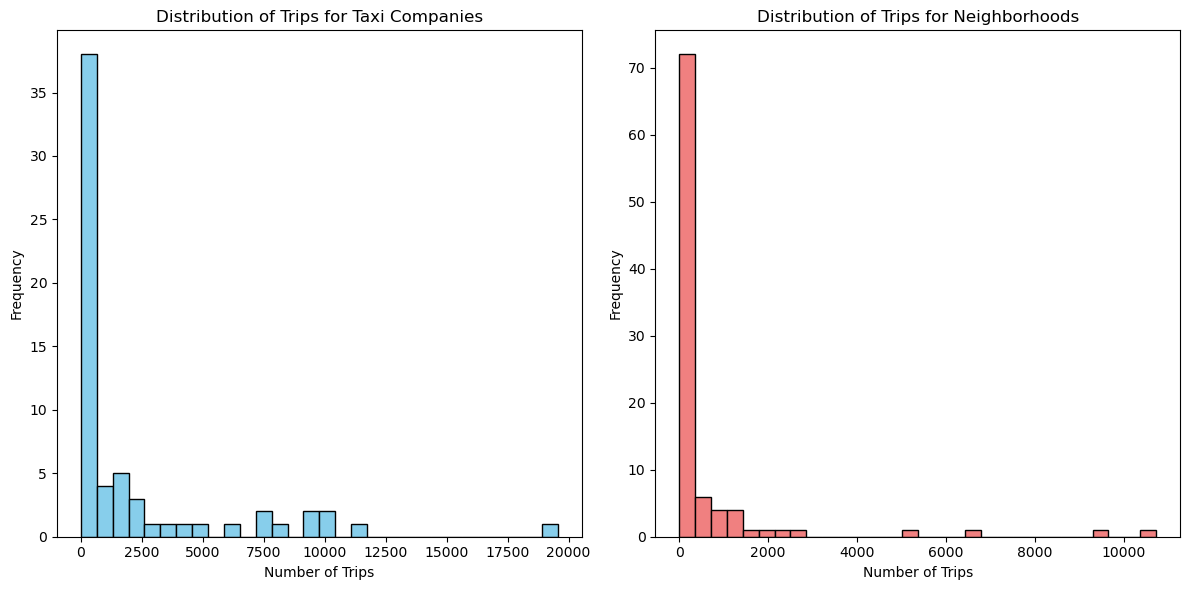

In [8]:
# Plotting the distribution of trips for taxi companies
plt.figure(figsize=(12, 6))

# Taxi Companies trips plot
plt.subplot(1, 2, 1)
plt.hist(df_taxi['trips_amount'], bins=30, color='skyblue', edgecolor='black')
plt.title('Distribution of Trips for Taxi Companies')
plt.xlabel('Number of Trips')
plt.ylabel('Frequency')


# Neighborhoods trips plot
plt.subplot(1, 2, 2)
plt.hist(df_neighborhoods['average_trips'], bins=30, color='lightcoral', edgecolor='black')
plt.title('Distribution of Trips for Neighborhoods')
plt.xlabel('Number of Trips')
plt.ylabel('Frequency')

# Show the plots
plt.tight_layout()
plt.show()

### Conclution of the data study.
1. df_taxi (Taxi Company Data):
- company_name: Names of 64 different taxi companies.
- trips_amount: The number of rides for each taxi company between November 15-16, 2017.
- Data type: company_name is a string (object), and trips_amount is an integer (int64).

2. df_neighborhoods (Chicago Neighborhoods Data):
- dropoff_location_name: Names of 94 neighborhoods where rides ended.
- average_trips: The average number of rides ending in each neighborhood for November 15-16, 2017.
- Data type: dropoff_location_name is a string (object), and average_trips is a floating-point number (float64).

3. There is no null value on either of 2 datasets.
4. There is no duplicated rows.
5. Both datasets show a lot of variation, with a few companies and neighborhoods having many more trips than the rest. This suggests a skewed distribution, where most have fewer trips.
6. Data types 
- Taxi Company name:
  - company_name is object(string) - This is appropriate because company names are categorical text data.
  - trips_amount: int64 — This is correct because the number of trips is a whole number.

- Neighborhoods
  - dropoff_location_name: object (string) — This is appropriate since neighborhood names are categorical text data.
  - average_trips: float64 — This is correct because the number of trips is represented as a decimal (average), which requires a float data type.

## Identify the top 10 neighborhoods in terms of drop-offs


  dropoff_location_name  average_trips
0                  Loop   10727.466667
1           River North    9523.666667
2         Streeterville    6664.666667
3             West Loop    5163.666667
4                O'Hare    2546.900000
5             Lake View    2420.966667
6            Grant Park    2068.533333
7         Museum Campus    1510.000000
8            Gold Coast    1364.233333
9    Sheffield & DePaul    1259.766667


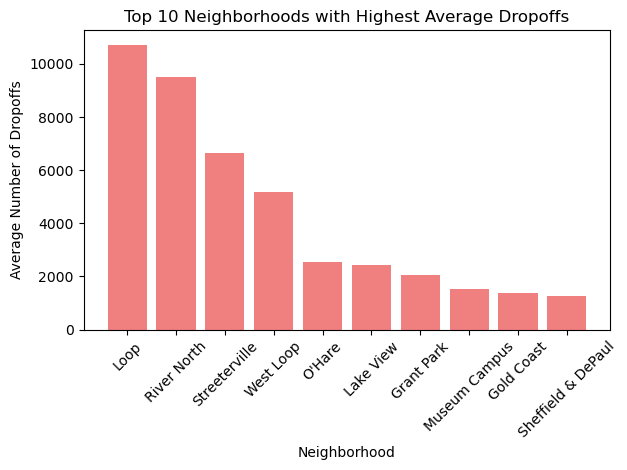

In [9]:
# identify the top 10 neighborhoods with the highest average number of dropoffs
top_neighborhoods = df_neighborhoods.sort_values(by='average_trips', ascending=False).head(10)
print(top_neighborhoods)

# Top 10 neighborhoods by average drop-offs bar plot 
plt.bar(top_neighborhoods['dropoff_location_name'], top_neighborhoods['average_trips'], color='lightcoral')
plt.title('Top 10 Neighborhoods with Highest Average Dropoffs')
plt.xlabel('Neighborhood')
plt.ylabel('Average Number of Dropoffs')
plt.xticks(rotation=45)

# Show the plots
plt.tight_layout() 
plt.show()

Based on the data, the top 10 neighborhoods with the highest average number of drop-offs in Chicago are as follows:

- Loop: Leading with the highest average of 10,727 drop-offs.
- River North: Close behind with 9,524 average drop-offs.
- Streeterville: 6,665 average drop-offs, maintaining a strong presence.
- West Loop: 5,164 average drop-offs, showing notable activity.
- O'Hare: With 2,547 average drop-offs, this area likely includes airport-related trips.
- Lake View: A busy area with 2,421 average drop-offs.
- Grant Park: 2,069 average drop-offs, indicative of a popular destination.
- Museum Campus: 1,510 average drop-offs, likely driven by tourism and attractions.
- Gold Coast: With 1,364 average drop-offs, a well-frequented area.
- Sheffield & DePaul: Rounding out the top 10 with 1,260 average drop-offs, likely influenced by local universities and residential areas.

These neighborhoods represent high-traffic locations, with the Loop, River North, and Streeterville showing the highest concentrations of drop-offs.

## Making graphs: taxi companies and number of rides, top 10 neighborhoods by number of dropoffs

In [10]:
# identifying the top 15 Taxi Company and their total trips
top_taxi_co = df_taxi.sort_values(by='trips_amount', ascending=False).head(15)
print(top_taxi_co)

                            company_name  trips_amount
0                              Flash Cab         19558
1              Taxi Affiliation Services         11422
2                       Medallion Leasin         10367
3                             Yellow Cab          9888
4        Taxi Affiliation Service Yellow          9299
5              Chicago Carriage Cab Corp          9181
6                           City Service          8448
7                               Sun Taxi          7701
8              Star North Management LLC          7455
9      Blue Ribbon Taxi Association Inc.          5953
10               Choice Taxi Association          5015
11                            Globe Taxi          4383
12             Dispatch Taxi Affiliation          3355
13             Nova Taxi Affiliation Llc          3175
14  Patriot Taxi Dba Peace Taxi Associat          2235


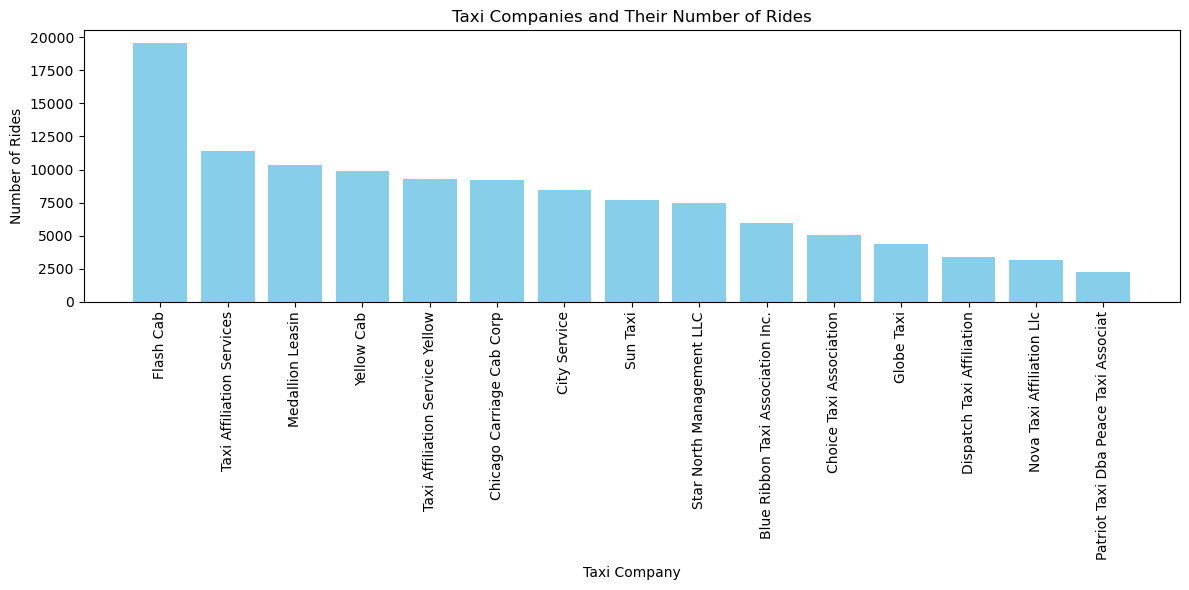

In [11]:

# Ploting taxi companies and their number of rides
plt.figure(figsize=(12, 6))

# Taxi Companies bar plot
plt.bar(top_taxi_co['company_name'], top_taxi_co['trips_amount'], color='skyblue')
plt.title('Taxi Companies and Their Number of Rides')
plt.xlabel('Taxi Company')
plt.ylabel('Number of Rides')
plt.xticks(rotation=90)

#Show plot
plt.tight_layout()
plt.show()

Key Observations:
- Flash Cab has the highest number of rides, significantly outpacing all other taxi companies.
- Taxi Affiliation Services, Medallion Leasing, and Yellow Cab also have a relatively high number of rides but remain well behind Flash Cab.
- The distribution of rides among companies is uneven and skewed, with a few companies dominating the market while many others account for much smaller ride volumes.
- Mid-tier companies like Chicago Carriage Cab Corp, City Service, and Sun Taxi show moderate ride counts, forming a noticeable drop after the top-ranked companies.
- A long tail effect is evident, where smaller companies, particularly those on the far right, have significantly fewer rides compared to the leading ones.
- The difference between the top and bottom-ranked companies is stark, highlighting a concentrated market share among a few dominant players.

# Step 5. Testing hypotheses (Python)
Test the hypothesis:

"The average duration of rides from the Loop to O'Hare International Airport changes on rainy Saturdays."

Decide where to set the significance level (alpha) on your own.

In [12]:
# Importing the csv files
df_query = pd.read_csv('project_sql_result_07.csv' , sep=',')  # data on rides from the Loop to O'Hare International Airport
print(df_query.head())
df_query.info()

              start_ts weather_conditions  duration_seconds
0  2017-11-25 16:00:00               Good            2410.0
1  2017-11-25 14:00:00               Good            1920.0
2  2017-11-25 12:00:00               Good            1543.0
3  2017-11-04 10:00:00               Good            2512.0
4  2017-11-11 07:00:00               Good            1440.0
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1068 entries, 0 to 1067
Data columns (total 3 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   start_ts            1068 non-null   object 
 1   weather_conditions  1068 non-null   object 
 2   duration_seconds    1068 non-null   float64
dtypes: float64(1), object(2)
memory usage: 25.2+ KB


In [13]:
# Converting data types
df_query['start_ts']= pd.to_datetime(df_query['start_ts'])
print(df_query.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1068 entries, 0 to 1067
Data columns (total 3 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   start_ts            1068 non-null   datetime64[ns]
 1   weather_conditions  1068 non-null   object        
 2   duration_seconds    1068 non-null   float64       
dtypes: datetime64[ns](1), float64(1), object(1)
memory usage: 25.2+ KB
None


In [14]:
# Checking for duplicates
print(df_query.duplicated().sum())

197


In [15]:
# Dropping duplicates
df_query.drop_duplicates(inplace=True)
print(df_query.duplicated().sum())

0


In [16]:
# Filtering data for saturdays
df_query['dow'] = df_query['start_ts'].dt.day_name()
saturday_rides = df_query[df_query['dow'] == 'Saturday']
print(saturday_rides)

                start_ts weather_conditions  duration_seconds       dow
0    2017-11-25 16:00:00               Good            2410.0  Saturday
1    2017-11-25 14:00:00               Good            1920.0  Saturday
2    2017-11-25 12:00:00               Good            1543.0  Saturday
3    2017-11-04 10:00:00               Good            2512.0  Saturday
4    2017-11-11 07:00:00               Good            1440.0  Saturday
...                  ...                ...               ...       ...
1060 2017-11-04 14:00:00               Good            2700.0  Saturday
1061 2017-11-18 16:00:00                Bad            2186.0  Saturday
1063 2017-11-25 11:00:00               Good               0.0  Saturday
1064 2017-11-11 10:00:00               Good            1318.0  Saturday
1067 2017-11-04 16:00:00                Bad            2834.0  Saturday

[871 rows x 4 columns]


In [17]:
# Split into rainy and non-rainy satuardays (Bad weather = Rainy)
rainy_saturdays = saturday_rides[saturday_rides['weather_conditions'] == 'Bad']
non_rainy_saturdays = saturday_rides[saturday_rides['weather_conditions'] == 'Good']

# Extract Ride Duration in Weather Conditions
duration_rainy = rainy_saturdays['duration_seconds']
duration_non_rainy = non_rainy_saturdays['duration_seconds']

print(duration_rainy)   
print(duration_non_rainy)

6       2969.0
30      1980.0
34      2460.0
51      2760.0
52      2460.0
         ...  
1031    2560.0
1032    1908.0
1053    2400.0
1061    2186.0
1067    2834.0
Name: duration_seconds, Length: 148, dtype: float64
0       2410.0
1       1920.0
2       1543.0
3       2512.0
4       1440.0
         ...  
1057    2492.0
1059    1303.0
1060    2700.0
1063       0.0
1064    1318.0
Name: duration_seconds, Length: 723, dtype: float64


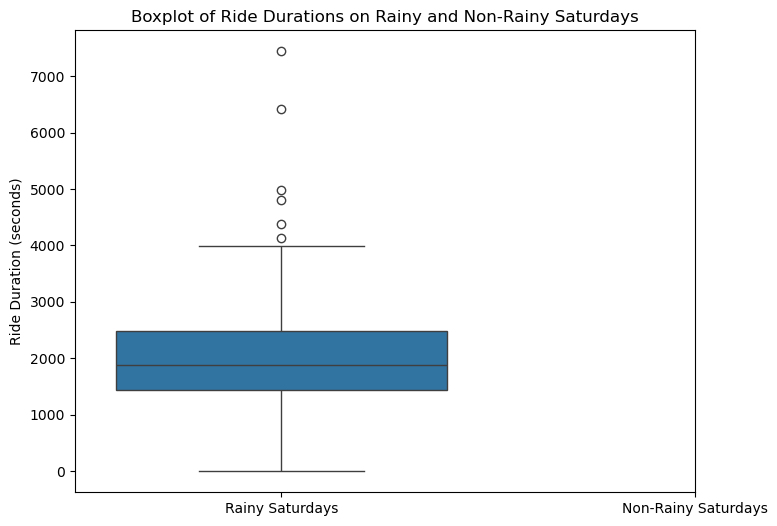

In [29]:
# Combine the two datasets for visualization
plt.figure(figsize=(8, 6))
sns.boxplot(data=[duration_rainy, duration_non_rainy], showfliers=True)
plt.xticks([0, 1], ['Rainy Saturdays', 'Non-Rainy Saturdays'])
plt.ylabel('Ride Duration (seconds)')
plt.title('Boxplot of Ride Durations on Rainy and Non-Rainy Saturdays')
plt.show()


In [19]:
# Function to remove outliers using IQR
def remove_outliers_iqr(data):
    Q1 = data.quantile(0.25)  # 25th percentile
    Q3 = data.quantile(0.75)  # 75th percentile
    IQR = Q3 - Q1             # Interquartile range
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return data[(data >= lower_bound) & (data <= upper_bound)]

# Apply IQR filtering
filtered_duration_rainy = remove_outliers_iqr(duration_rainy)
filtered_duration_non_rainy = remove_outliers_iqr(duration_non_rainy)

# Print the number of outliers removed
print(f"Outliers removed from rainy Saturdays: {len(duration_rainy) - len(filtered_duration_rainy)}")
print(f"Outliers removed from non-rainy Saturdays: {len(duration_non_rainy) - len(filtered_duration_non_rainy)}")

Outliers removed from rainy Saturdays: 1
Outliers removed from non-rainy Saturdays: 6


In [27]:
print(len(filtered_duration_rainy))
print()
print()
print(len(filtered_duration_non_rainy))


147


717


 ## Testing hypothesis

The average duration of rides from the Loop to O'Hare International Airport changes on rainy Saturdays. 


In [28]:



#Null Hypothesis (H0): The average ride duration from the Loop to O'Hare on rainy Saturdays is the same as on non-rainy Saturdays.
#Alternative Hypothesis (H1): The average duration of rides on rainy Saturdays is different from non-rainy Saturdays.

#Performing t-test
stat, p_value = stats.ttest_ind(filtered_duration_rainy, filtered_duration_non_rainy, equal_var=False)  # Variances are not assumed to be equal

# Sagnificance level
alpha = 0.05

# Print the results
print(f"t-statistic: {stat:.6f}, p-value: {p_value:.6f}")
if p_value < alpha:
    print("Reject the null hypothesis: Ride durations on rainy weather Saturdays are significantly different.")
else:
    print("Fail to reject the null hypothesis: No significant difference in ride duration.")


t-statistic: 5.939266, p-value: 0.000000
Reject the null hypothesis: Ride durations on rainy weather Saturdays are significantly different.


Null Hypothesis (H₀): There is no significant difference in ride durations on rainy weather Saturdays compared to non-rainy weather Saturdays. In other words, the average ride durations for both groups are equal.

Alternative Hypothesis (H₁): There is a significant difference in ride durations on rainy weather Saturdays compared to non-rainy weather Saturdays. This implies that the average ride durations for the two groups are different.

The null hypothesis represents the assumption of no effect or no difference, while the alternative hypothesis posits that there is a difference that should be tested.


<b>Based on the result</b>: Ride duration on rainy weather Saturaday are sagnifacatly different.


I used t-test to compare the ride durations between rainy and non-rainy Saturdays, depending on the data's normality and variance equality because the data is normally distributed, the duration for rainy and non-rainy satuarday are separate group and sample size are not extremly small.

I chose 0.05 as threshold to test it

p < 0.05: Reject the null hypothesis (significant difference).

p ≥ 0.05: Fail to reject the null hypothesis (no significant difference).

